# ADVANCE LOG-LINEAR REGRESSION MODEL -  

#### Importing the relevent libraries -

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Loading the raw_data -

In [5]:
raw_data = pd.read_csv('Automobiles_Data.csv')  # Importing data using pandas method to convert it into DataFrame.
raw_data.head() # Top 5 Records in DataFrame.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing -

#### Exploring the descriptive statistics of the variables.

In [8]:
raw_data.describe(include='all')  # To get descriptive data from all variables. 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Determining variables of interest.

In [10]:
data = raw_data.drop(['Model'],axis=1)  # Removed "Model" column using pandas drop method.
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Dealing with missing values.

In [12]:
data.isnull().sum()  # To Check missing values per columns.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
data_no_mv = data.dropna(axis=0)  # Adhoc method to removes observations with missing values (<5% of total observations).
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Exploring the PDFs : Probability distribution functions.

From above statstics price have some "Outliers".

<Axes: xlabel='Price', ylabel='Density'>

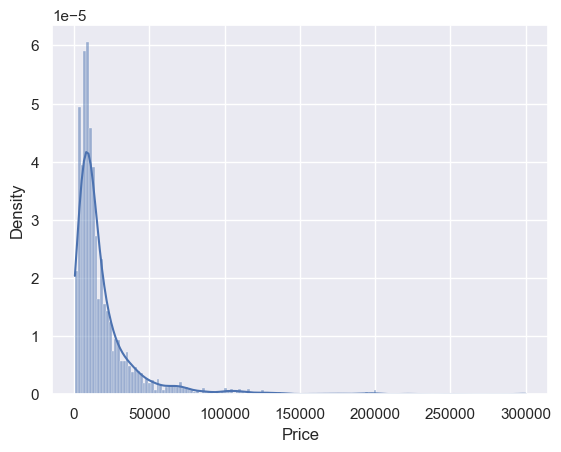

In [16]:
sns.histplot(data_no_mv['Price'],kde=True,stat='density')

For optimal result we looking for "Normal Distribution" price however is an "Exponential Distribution". 

In above graph skewness in positive side (thin tailed) shows "Outliers" presents in price variable.

### Dealing with outliers.

In [20]:
q = data_no_mv['Price'].quantile(0.99)  # Removed Top 1% Outliers from price variable using pandas quantile method by getting 99 percentile value.
data_1 = data_no_mv[data_no_mv['Price']<q]  # Keeping the Price data below 99%
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


<Axes: xlabel='Price', ylabel='Density'>

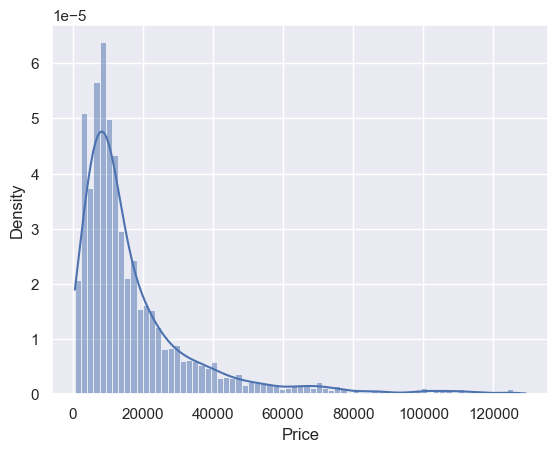

In [21]:
sns.histplot(data_1['Price'],kde=True,stat='density')

From above graph can be seen less "outliers" than before.

##### For Milege Outliers.

<Axes: xlabel='Mileage', ylabel='Density'>

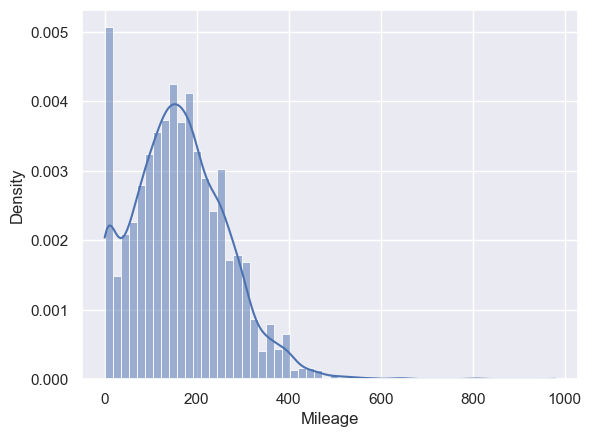

In [24]:
sns.histplot(data_no_mv['Mileage'],kde=True,stat='density')

In [25]:
q = data_no_mv['Mileage'].quantile(0.99)  # Removed Top 1% Outliers from Mileage variable by getting 99 percentile value.
data_2 = data_1[data_1['Mileage']<q]  # Keeping the Mileage data below 99%

<Axes: xlabel='Mileage', ylabel='Density'>

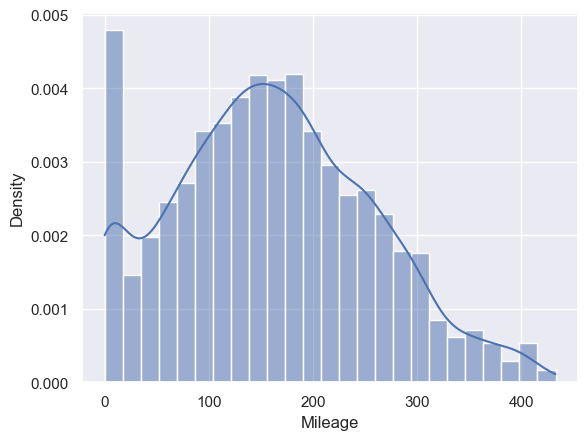

In [26]:
sns.histplot(data_2['Mileage'],kde=True,stat='density')

Way less "Outliers" now in shown in above graph.

##### EngineV PDF -

<Axes: xlabel='EngineV', ylabel='Density'>

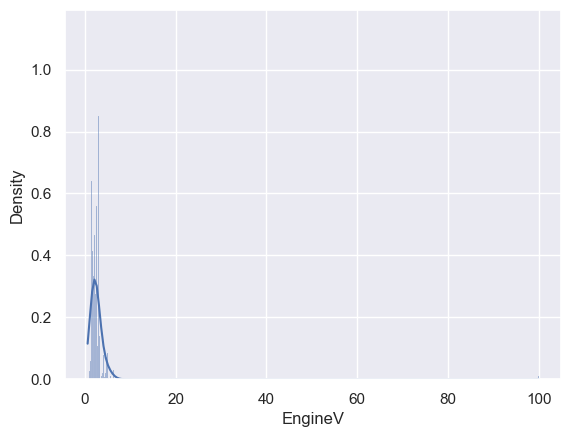

In [29]:
sns.histplot(data_no_mv['EngineV'],kde=True,stat='density')

To tackle with incorrect EngineV value we get those values only which are lower than 6.5 which is ideal in car engine volume.

In [31]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Density'>

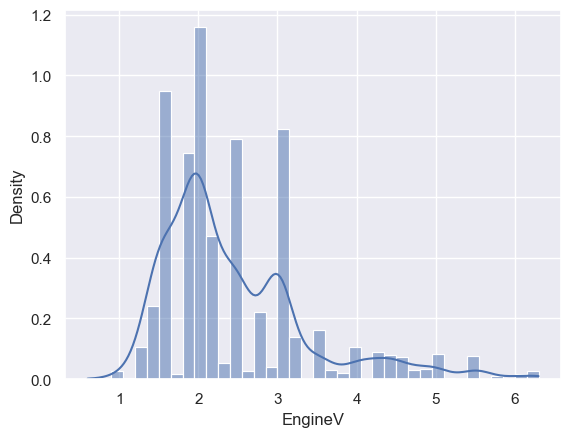

In [32]:
sns.histplot(data_3['EngineV'],kde=True,stat='density')

##### Year PDF -

<Axes: xlabel='Year', ylabel='Density'>

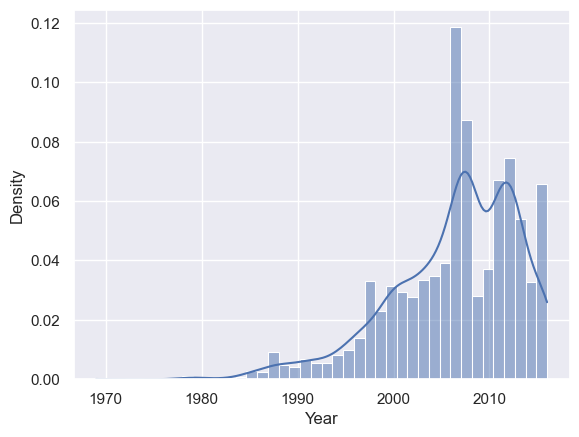

In [34]:
sns.histplot(data_no_mv['Year'],kde=True,stat='density')

In [35]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

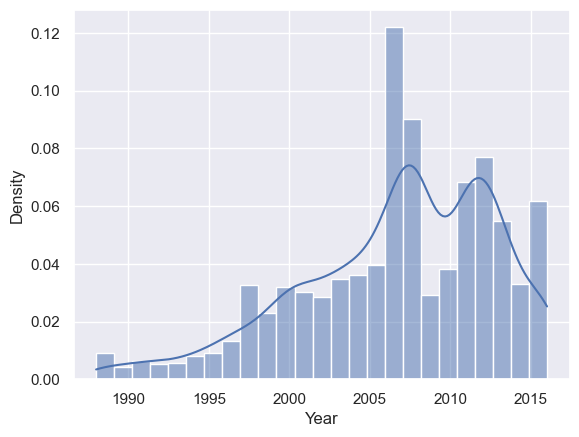

In [36]:
sns.histplot(data_4['Year'],kde=True,stat='density')

In [37]:
data_cleaned = data_4.reset_index(drop=True)  # To reset all older indices.

In [38]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


##### We deleted 250 observation, which were problematic for drawing regression.

## Checking the OLS assumptions -

OLS : Ordinary least Squares.

#### Checking Linearity using scatter plot.

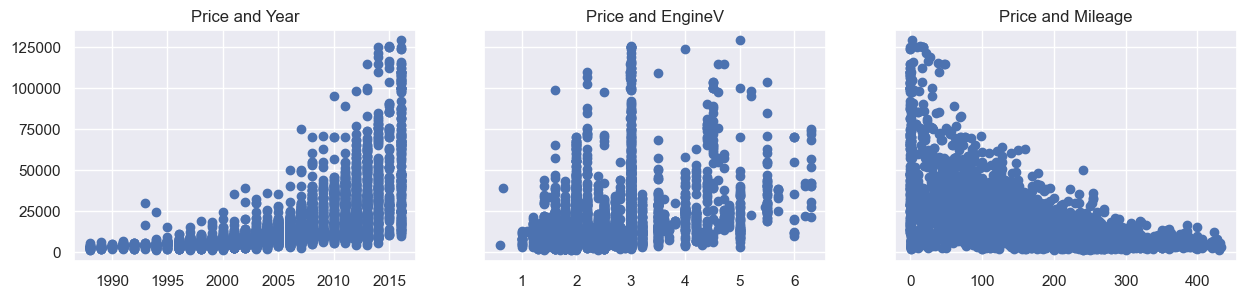

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))  # Using Matplotlib code to generate maps.
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

From above plots we cannot see any linear formations. For running regression we have to transform some of variables.

<Axes: xlabel='Price', ylabel='Density'>

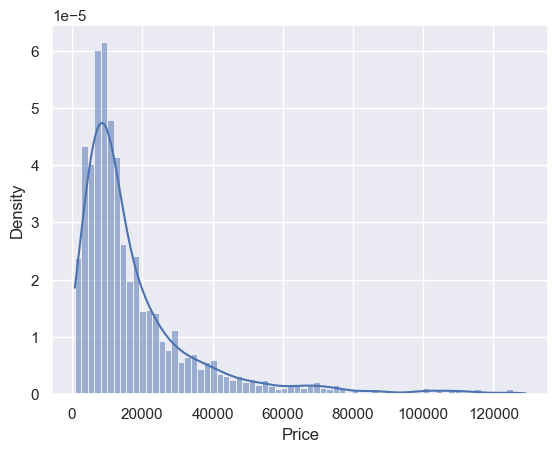

In [45]:
sns.histplot(data_cleaned['Price'],kde=True,stat='density')

From above we can say "Price" is "Exponential Distributed" rather than "Normal Distributed" so it's relationships with other variable also not normal distribution to deal this issue we will use "Log Transformation".

### Relaxing the assumptions.

In [48]:
log_price = np.log(data_cleaned['Price'])  # Using numpy method to get log value of price variable.
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


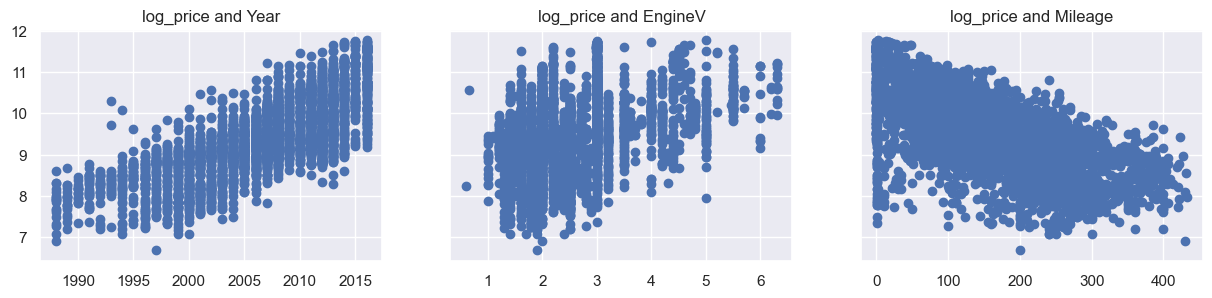

In [49]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

We can see linear formation in all maps now after introducing value of "log_price"

In [51]:
data_cleaned = data_cleaned.drop(['Price'],axis=1) # Dropped price column because we no longer needed.

### Multicollinearity

In [53]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [55]:
vif  # Checking VIF : Variance Inflation factor

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


From above table we found Year is too correlated with other variables hence we will remove year from data.

In [57]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables.

In [59]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


#### Rearranging Columns-

In [61]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [62]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [63]:
data_preprocessed = data_with_dummies[cols]  # Put dependent feature on first column.
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


# Linear regression model.

### Declaring inputs and the targets.

In [66]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scaling the data.

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [69]:
scaler.get_params()  # To see parameter in fitted scaler.

{'copy': True, 'with_mean': True, 'with_std': True}

In [70]:
inputs_scaled = scaler.transform(inputs)

## Train test split.

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### Creating regression.

In [74]:
reg = LinearRegression()  # reg instance of Linear Regression class.
reg.fit(x_train, y_train)

LinearRegression()

In [75]:
y_hat = reg.predict(x_train)

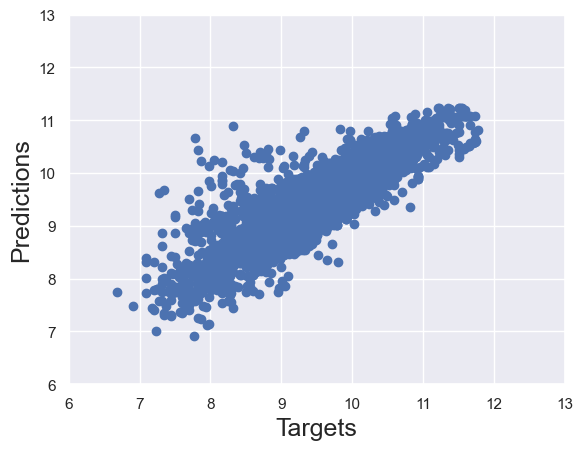

In [76]:
plt.scatter(y_train,y_hat)  # Checking the result of our model by plotting scatter plot.
plt.xlabel('Targets',size = 18)
plt.ylabel('Predictions',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Our Model result seems fine, the formation of dots almost in straight line.

#### Checking residual plot.

Residual = Difference between targets and predictions.

Text(0.5, 1.0, 'Residual PDF')

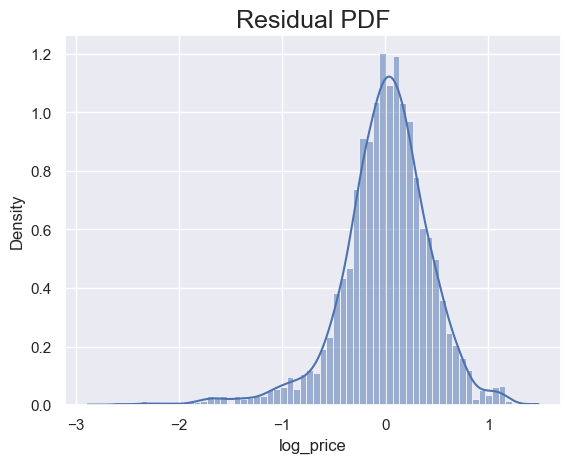

In [80]:
sns.histplot(y_train - y_hat, kde=True, stat = 'density')
plt.title('Residual PDF', size = 18)

From residual plot we can say error is normally distributed with mean 0 which is required by assumption - Normality and Homoscedasticity.

$ R^2 = $

In [83]:
reg.score(x_train, y_train)  # R squared value

0.7415645182486198

### Calculating weights and bias.

In [85]:
reg.intercept_  # Intercept / Constant or Bias

9.413280072375791

In [86]:
reg.coef_  # Coefficients or Weights

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [87]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


Above summary of weights are uninterpretable because of logrhythm applies to price and all features/variables standardized including dummies which is not problem when using sk learn.

## Testing - 

In [90]:
y_hat_test = reg.predict(x_test)

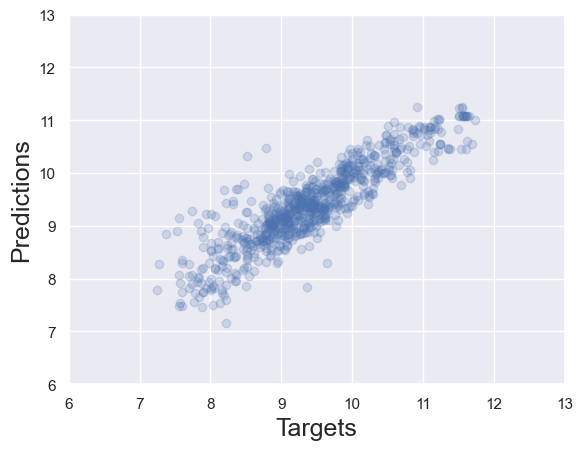

In [91]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets',size = 18)
plt.ylabel('Predictions',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [92]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])  # Converting back to prices from log prices by using numpy method.
df_performance.head()

,Prediction
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [93]:
y_test = y_test.reset_index(drop=True)  # Reseting the indices.
y_test.head()

0    7.740664
1    9.487972
2    8.999619
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [94]:
df_performance['Target'] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0


In [95]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Difference%'] = np.absolute(df_performance['Residual'] / df_performance['Target'] * 100)
df_performance.head()

,Prediction,Target,Residual,Difference%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369


In [96]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465


In [97]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x : '%.2f' % x)  # Setting pandas rows limitation and float decimal value.

df_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
264,11493.47,11500.00,6.53,0.06
742,16985.25,16999.00,13.75,0.08
60,12486.36,12500.00,13.64,0.11
127,23257.55,23200.00,-57.55,0.25
308,8876.92,8900.00,23.08,0.26
242,7478.35,7500.00,21.65,0.29
698,30600.22,30500.00,-100.22,0.33
379,17733.15,17800.00,66.85,0.38
114,27429.73,27300.00,-129.73,0.48
317,11560.12,11500.00,-60.12,0.52


Above summary explains the prdictions with refernce to their targets.

#### From above summary's "difference%" column we can check how far we off in prediction.